Generating synthetic data...

Training with Batch Gradient Descent...
Training with Stochastic Gradient Descent...
Training with Mini-batch Gradient Descent...

RESULTS
True parameters: intercept=7.0, slope=3.0

Batch GD:      intercept=2.9665, slope=2.8046
SGD:           intercept=6.9911, slope=2.3811
Mini-batch GD: intercept=7.0875, slope=2.9397

Saved: loss_comparison.png
Saved: parameter_trajectory.png
Saved: fitted_lines.png
Saved: summary_comparison.png


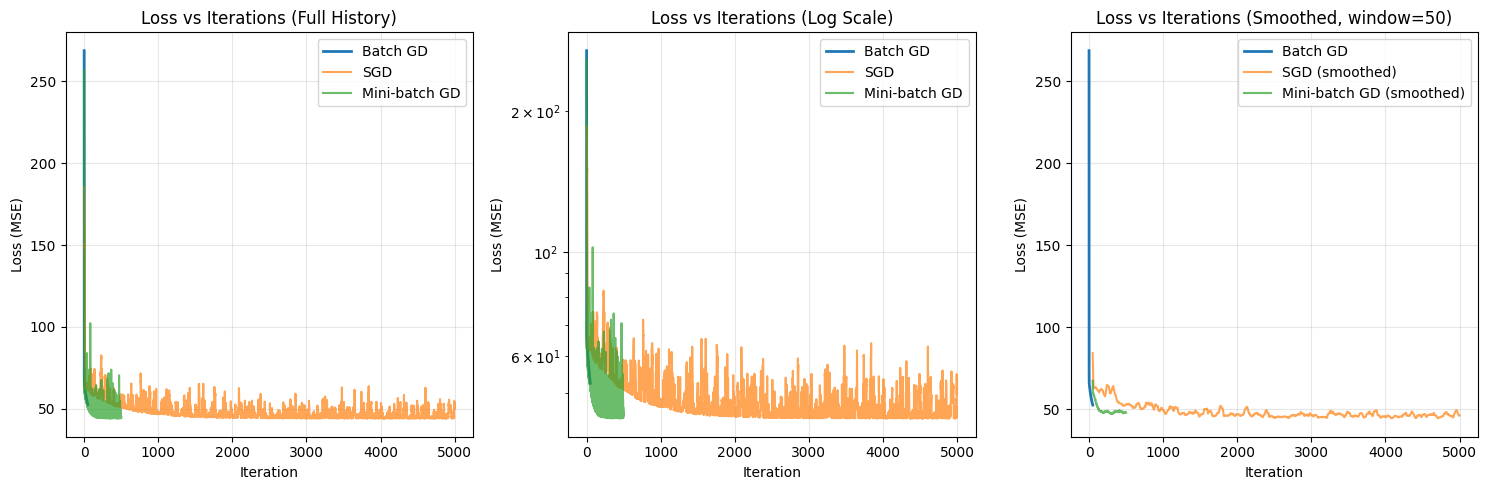

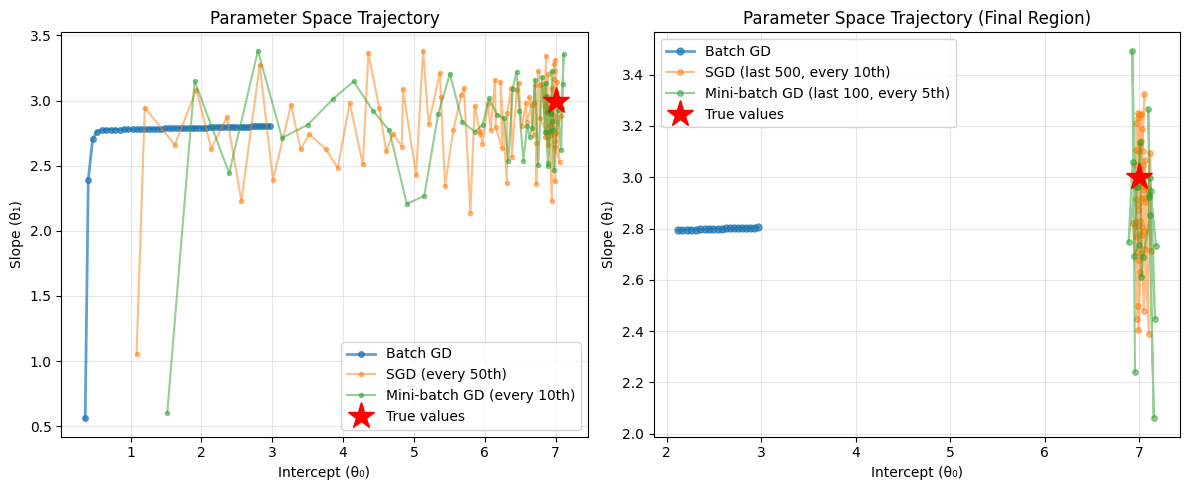

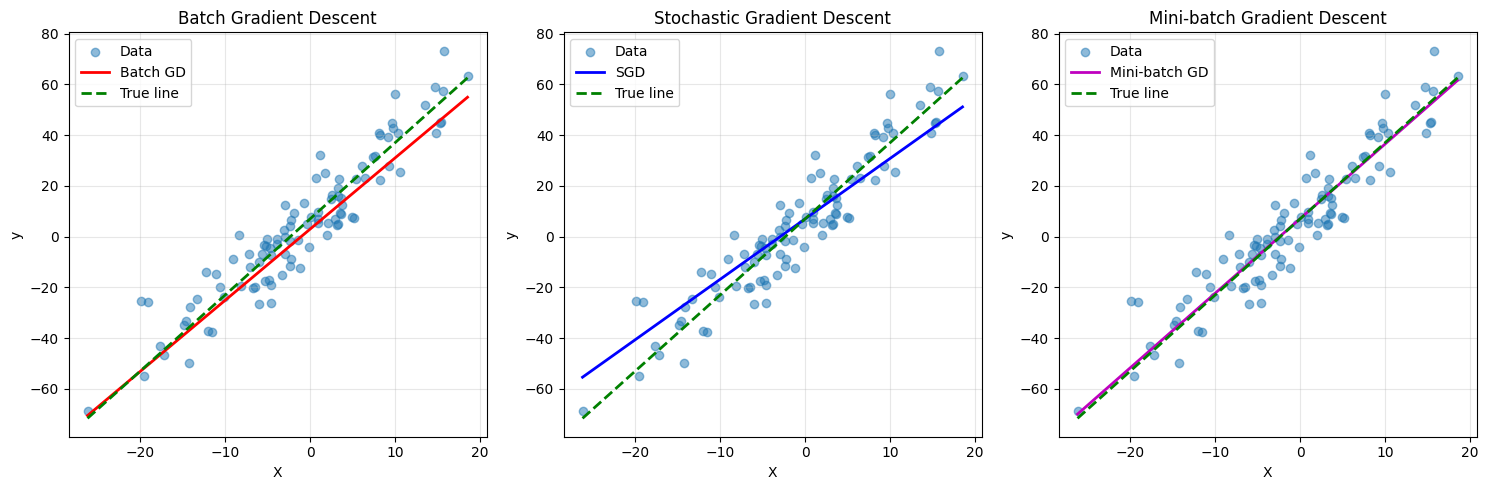

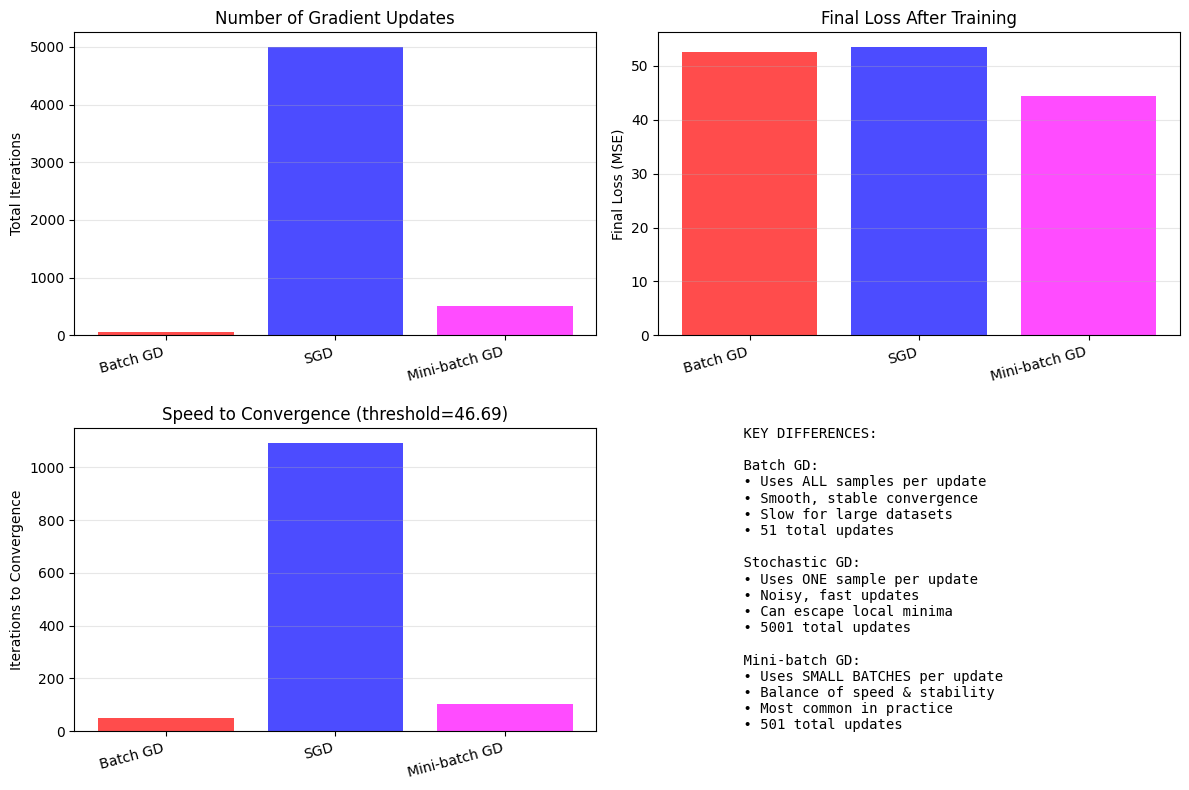


All visualizations complete!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_data(n_samples=100, noise=10):
    """
    Generate synthetic data for linear regression
    y = 3x + 7 + noise
    """
    X = np.random.randn(n_samples, 1) * 10
    y = 3 * X + 7 + np.random.randn(n_samples, 1) * noise
    return X, y

# Loss function (Mean Squared Error)
def mse_loss(X, y, theta):
    """
    Calculate Mean Squared Error
    """
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss

# Gradient calculation
def compute_gradient(X, y, theta):
    """
    Compute gradient of MSE loss
    """
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

# Batch Gradient Descent (GD)
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=100):
    """
    Batch Gradient Descent - uses all samples in each iteration
    """
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_history = [theta.copy()]
    loss_history = [mse_loss(X, y, theta)]
    
    for iteration in range(n_iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - learning_rate * gradient
        
        theta_history.append(theta.copy())
        loss_history.append(mse_loss(X, y, theta))
    
    return theta, theta_history, loss_history

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=100):
    """
    Stochastic Gradient Descent - uses one sample at a time
    """
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_history = [theta.copy()]
    loss_history = [mse_loss(X, y, theta)]
    
    for epoch in range(n_epochs):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(m):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradient
            
            theta_history.append(theta.copy())
            loss_history.append(mse_loss(X, y, theta))
    
    return theta, theta_history, loss_history

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.01, n_epochs=100, batch_size=10):
    """
    Mini-batch Gradient Descent - uses small batches of samples
    """
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_history = [theta.copy()]
    loss_history = [mse_loss(X, y, theta)]
    
    for epoch in range(n_epochs):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            
            batch_m = len(yi)
            gradient = (1/batch_m) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradient
            
            theta_history.append(theta.copy())
            loss_history.append(mse_loss(X, y, theta))
    
    return theta, theta_history, loss_history

# Main execution
def main():
    # Generate data
    print("Generating synthetic data...")
    X, y = generate_data(n_samples=100, noise=10)
    
    # Add bias term (intercept)
    X_b = np.c_[np.ones((len(X), 1)), X]
    
    # Set hyperparameters
    learning_rate = 0.01
    n_iterations = 50
    batch_size = 10
    
    print("\nTraining with Batch Gradient Descent...")
    theta_gd, theta_history_gd, loss_history_gd = batch_gradient_descent(
        X_b, y, learning_rate, n_iterations
    )
    
    print("Training with Stochastic Gradient Descent...")
    theta_sgd, theta_history_sgd, loss_history_sgd = stochastic_gradient_descent(
        X_b, y, 0.001, n_iterations
    )
    
    print("Training with Mini-batch Gradient Descent...")
    theta_mbgd, theta_history_mbgd, loss_history_mbgd = mini_batch_gradient_descent(
        X_b, y, learning_rate, n_iterations, batch_size
    )
    
    # Print results
    print("\n" + "="*60)
    print("RESULTS")
    print("="*60)
    print(f"True parameters: intercept=7.0, slope=3.0")
    print(f"\nBatch GD:      intercept={theta_gd[0][0]:.4f}, slope={theta_gd[1][0]:.4f}")
    print(f"SGD:           intercept={theta_sgd[0][0]:.4f}, slope={theta_sgd[1][0]:.4f}")
    print(f"Mini-batch GD: intercept={theta_mbgd[0][0]:.4f}, slope={theta_mbgd[1][0]:.4f}")
    print("="*60)
    
    # Create visualizations
    create_visualizations(X, y, X_b, 
                         theta_gd, theta_sgd, theta_mbgd,
                         theta_history_gd, theta_history_sgd, theta_history_mbgd,
                         loss_history_gd, loss_history_sgd, loss_history_mbgd)

def create_visualizations(X, y, X_b, theta_gd, theta_sgd, theta_mbgd,
                         theta_history_gd, theta_history_sgd, theta_history_mbgd,
                         loss_history_gd, loss_history_sgd, loss_history_mbgd):
    """
    Create comprehensive visualizations comparing the three methods
    """
    
    # Figure 1: Loss curves comparison
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Full loss history
    plt.subplot(1, 3, 1)
    plt.plot(loss_history_gd, label='Batch GD', linewidth=2)
    plt.plot(loss_history_sgd, label='SGD', alpha=0.7)
    plt.plot(loss_history_mbgd, label='Mini-batch GD', alpha=0.7)
    plt.xlabel('Iteration')
    plt.ylabel('Loss (MSE)')
    plt.title('Loss vs Iterations (Full History)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Loss history (log scale)
    plt.subplot(1, 3, 2)
    plt.plot(loss_history_gd, label='Batch GD', linewidth=2)
    plt.plot(loss_history_sgd, label='SGD', alpha=0.7)
    plt.plot(loss_history_mbgd, label='Mini-batch GD', alpha=0.7)
    plt.xlabel('Iteration')
    plt.ylabel('Loss (MSE)')
    plt.yscale('log')
    plt.title('Loss vs Iterations (Log Scale)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 3: Smoothed comparison (for SGD and mini-batch)
    plt.subplot(1, 3, 3)
    window = 50
    
    def smooth(data, window):
        if len(data) < window:
            return data
        return np.convolve(data, np.ones(window)/window, mode='valid')
    
    plt.plot(loss_history_gd, label='Batch GD', linewidth=2)
    if len(loss_history_sgd) >= window:
        plt.plot(range(window-1, len(loss_history_sgd)), 
                smooth(loss_history_sgd, window), 
                label='SGD (smoothed)', alpha=0.7)
    if len(loss_history_mbgd) >= window:
        plt.plot(range(window-1, len(loss_history_mbgd)), 
                smooth(loss_history_mbgd, window), 
                label='Mini-batch GD (smoothed)', alpha=0.7)
    plt.xlabel('Iteration')
    plt.ylabel('Loss (MSE)')
    plt.title(f'Loss vs Iterations (Smoothed, window={window})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./outputs/loss_comparison.png', dpi=300, bbox_inches='tight')
    print("\nSaved: loss_comparison.png")
    
    # Figure 2: Parameter trajectory in 2D space
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Full trajectory
    plt.subplot(1, 2, 1)
    gd_params = np.array([[th[0][0], th[1][0]] for th in theta_history_gd])
    sgd_params = np.array([[th[0][0], th[1][0]] for th in theta_history_sgd])
    mbgd_params = np.array([[th[0][0], th[1][0]] for th in theta_history_mbgd])
    
    plt.plot(gd_params[:, 0], gd_params[:, 1], 'o-', label='Batch GD', 
             markersize=4, linewidth=2, alpha=0.7)
    plt.plot(sgd_params[::50, 0], sgd_params[::50, 1], 'o-', label='SGD (every 50th)', 
             markersize=3, alpha=0.5)
    plt.plot(mbgd_params[::10, 0], mbgd_params[::10, 1], 'o-', label='Mini-batch GD (every 10th)', 
             markersize=3, alpha=0.5)
    
    plt.plot(7, 3, 'r*', markersize=20, label='True values', zorder=5)
    plt.xlabel('Intercept (θ₀)')
    plt.ylabel('Slope (θ₁)')
    plt.title('Parameter Space Trajectory')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Zoomed in final region
    plt.subplot(1, 2, 2)
    plt.plot(gd_params[-20:, 0], gd_params[-20:, 1], 'o-', label='Batch GD', 
             markersize=5, linewidth=2, alpha=0.7)
    
    if len(sgd_params) > 500:
        plt.plot(sgd_params[-500::10, 0], sgd_params[-500::10, 1], 'o-', 
                label='SGD (last 500, every 10th)', markersize=4, alpha=0.5)
    
    if len(mbgd_params) > 100:
        plt.plot(mbgd_params[-100::5, 0], mbgd_params[-100::5, 1], 'o-', 
                label='Mini-batch GD (last 100, every 5th)', markersize=4, alpha=0.5)
    
    plt.plot(7, 3, 'r*', markersize=20, label='True values', zorder=5)
    plt.xlabel('Intercept (θ₀)')
    plt.ylabel('Slope (θ₁)')
    plt.title('Parameter Space Trajectory (Final Region)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./outputs/parameter_trajectory.png', dpi=300, bbox_inches='tight')
    print("Saved: parameter_trajectory.png")
    
    # Figure 3: Final fitted lines
    plt.figure(figsize=(15, 5))
    
    x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_plot_b = np.c_[np.ones((len(x_plot), 1)), x_plot]
    
    plt.subplot(1, 3, 1)
    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(x_plot, x_plot_b.dot(theta_gd), 'r-', linewidth=2, label='Batch GD')
    plt.plot(x_plot, 3*x_plot + 7, 'g--', linewidth=2, label='True line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Batch Gradient Descent')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 2)
    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(x_plot, x_plot_b.dot(theta_sgd), 'b-', linewidth=2, label='SGD')
    plt.plot(x_plot, 3*x_plot + 7, 'g--', linewidth=2, label='True line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Stochastic Gradient Descent')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 3)
    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(x_plot, x_plot_b.dot(theta_mbgd), 'm-', linewidth=2, label='Mini-batch GD')
    plt.plot(x_plot, 3*x_plot + 7, 'g--', linewidth=2, label='True line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Mini-batch Gradient Descent')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('./outputs/fitted_lines.png', dpi=300, bbox_inches='tight')
    print("Saved: fitted_lines.png")
    
    # Figure 4: Summary comparison
    plt.figure(figsize=(12, 8))
    
    # Create a summary table
    methods = ['Batch GD', 'SGD', 'Mini-batch GD']
    iterations = [len(loss_history_gd), len(loss_history_sgd), len(loss_history_mbgd)]
    final_losses = [loss_history_gd[-1], loss_history_sgd[-1], loss_history_mbgd[-1]]
    
    plt.subplot(2, 2, 1)
    plt.bar(methods, iterations, color=['red', 'blue', 'magenta'], alpha=0.7)
    plt.ylabel('Total Iterations')
    plt.title('Number of Gradient Updates')
    plt.xticks(rotation=15, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.subplot(2, 2, 2)
    plt.bar(methods, final_losses, color=['red', 'blue', 'magenta'], alpha=0.7)
    plt.ylabel('Final Loss (MSE)')
    plt.title('Final Loss After Training')
    plt.xticks(rotation=15, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.subplot(2, 2, 3)
    convergence_threshold = 1.05 * min(loss_history_gd[-1], loss_history_sgd[-1], loss_history_mbgd[-1])
    
    gd_conv = next((i for i, loss in enumerate(loss_history_gd) if loss <= convergence_threshold), len(loss_history_gd))
    sgd_conv = next((i for i, loss in enumerate(loss_history_sgd) if loss <= convergence_threshold), len(loss_history_sgd))
    mbgd_conv = next((i for i, loss in enumerate(loss_history_mbgd) if loss <= convergence_threshold), len(loss_history_mbgd))
    
    plt.bar(methods, [gd_conv, sgd_conv, mbgd_conv], color=['red', 'blue', 'magenta'], alpha=0.7)
    plt.ylabel('Iterations to Convergence')
    plt.title(f'Speed to Convergence (threshold={convergence_threshold:.2f})')
    plt.xticks(rotation=15, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.subplot(2, 2, 4)
    # Text summary
    plt.axis('off')
    summary_text = f"""
    KEY DIFFERENCES:
    
    Batch GD:
    • Uses ALL samples per update
    • Smooth, stable convergence
    • Slow for large datasets
    • {len(loss_history_gd)} total updates
    
    Stochastic GD:
    • Uses ONE sample per update
    • Noisy, fast updates
    • Can escape local minima
    • {len(loss_history_sgd)} total updates
    
    Mini-batch GD:
    • Uses SMALL BATCHES per update
    • Balance of speed & stability
    • Most common in practice
    • {len(loss_history_mbgd)} total updates
    """
    plt.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
             verticalalignment='center')
    
    plt.tight_layout()
    plt.savefig('./outputs/summary_comparison.png', dpi=300, bbox_inches='tight')
    print("Saved: summary_comparison.png")
    
    plt.show()
    print("\nAll visualizations complete!")

if __name__ == "__main__":
    main()